In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(grid)

# Custom package
library(rutils)

-- Attaching packages -------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ----------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 10
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320

In [4]:
figo_hm_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/figo_hms.RData")))
survival_hm_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/survival_hms.RData")))

In [5]:
figo_hm_figs
survival_hm_figs

[1] "figo_headhm"        "figo_tailhm"        "figo_subcat_headhm"
[4] "figo_subcat_tailhm"

[1] "survival_hm"        "survival_subcat_hm"

In [6]:
set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}

hide_axis_text <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.text.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.text.y = element_blank())
    }
    plt
}

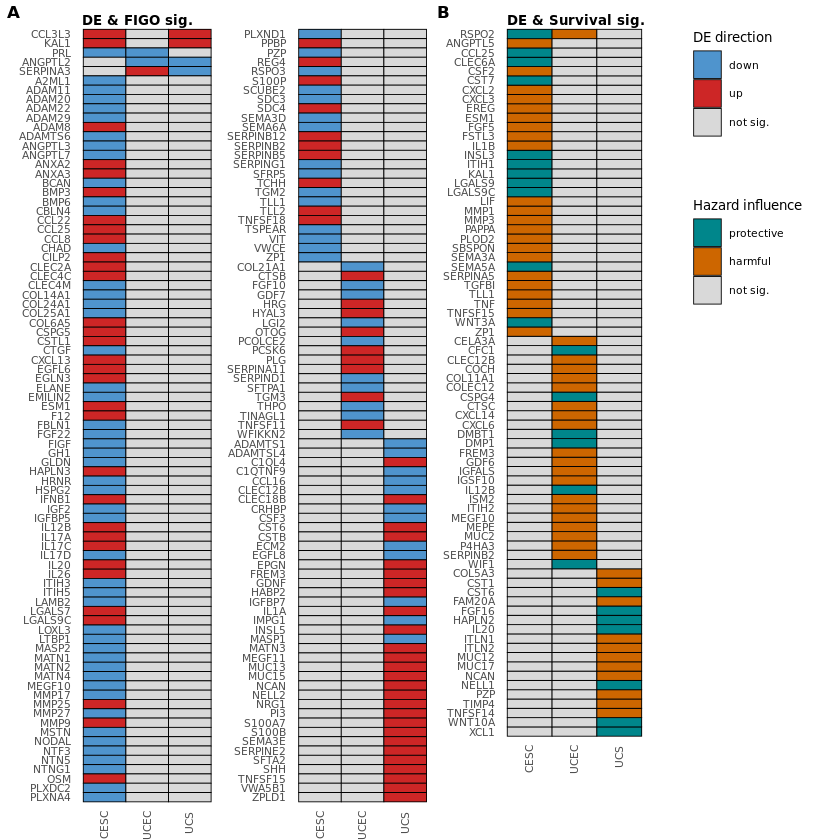

In [25]:
figo_hm_list <- c(
    c(mget("figo_headhm"), mget("figo_tailhm")) %>%
        purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0.25)) }) %>%
        purrr::map(function(p) { hide_legend(p) })
#         purrr::map(function(p) { hide_axis_text(p, "x") })
)

survival_hm_list <- c(
    mget("survival_hm") %>%
        purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0.25)) }) %>%
        purrr::map(function(p) { hide_legend(p) })
)

figs_grid <- plot_grid(
    figo_hm_list[[1]],
    figo_hm_list[[2]],
#     plot_grid(survival_hm_list[[1]], figo_hm_list[[1]], rel_heights = c(1, 0.0859), nrow = 2) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
    arrangeGrob(survival_hm_list[[1]], nullGrob(), nrow = 2, heights=c(1, 0.0880)),
    ncol = 3,
    axis = "lll",
    align = "v"
)
# figs_grid

labfigs_grid <- plot_grid(
    plot_grid(NULL, NULL, NULL, labels = c("A", "", "B"), ncol = 3, rel_widths = c(1, 1, 1), label_fontfamily = family, label_size = label_text_size, label_fontface = "bold"),
#     plot_grid(NULL, NULL, NULL, labels = c(str_pad("FIGO significant", 22, "right"), str_pad("", 22, "right"), str_pad("Survival significant", 22, "right")), ncol = 3, rel_widths = c(1, 1, 1), label_fontfamily = family, label_size = text_size, label_fontface = "bold", hjust = c(-0.5, 0, -0.48)),
    plot_grid(NULL, NULL, NULL, labels = c("DE & FIGO sig.", "", "DE & Survival sig."), ncol = 3, rel_widths = c(1, 1, 1), label_fontfamily = family, label_size = text_size, label_fontface = "bold", vjust = 1.7, hjust = c(-0.74, 0, -0.55)),
    figs_grid,
    align = "vh",
    nrow = 3,
    rel_heights = c(0.01, 0.025, 1)
)

# # labfigs_grid
# fig4 <- labfigs_grid

fig4 <- plot_grid(
#     figs_grid,
    labfigs_grid,
    plot_grid(
        get_legend(figo_hm_list[[1]] + theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm"))),
        get_legend(survival_hm_list[[1]] + theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm"))),
        NULL,
        rel_heights = c(1, 1, 3),
        nrow = 3,
        align = "vh"
    ),
    ncol = 2,
    align = "vh",
    rel_widths = c(1, 0.3)
)
fig4

In [26]:
ggsave(fig4, filename = paste0(dirs$figures_dir, "/paneled/figure4.png"), dpi = dpi, height = 8.5, width = 5)
